### Ignore warnings

In [41]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Add this line to your existing imports
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Basic import

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Classifiers

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Optimizer & evaluation

In [44]:
from sklearn.metrics import (accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix,
                             classification_report, precision_recall_curve, average_precision_score, 
                             precision_score, recall_score, f1_score)

### Data preprocessing

In [45]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [46]:
pwd = os.getcwd()
print(pwd)

e:\research\HEA_phase_classification\manuscript\figures


In [47]:
data = pd.read_excel(pwd+"/data/training_data/weighted_features.xlsx")
print("Shape of the dataset is: ", data.shape)

data.head()

Shape of the dataset is:  (111, 102)


,Composition,EquiTibrium conditions,phase_count,PhaseType,binary_1,binary_2,binary_3,binary_4,binary_5,binary_6,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,Al0.25MoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004675,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795
1,Al0.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004170,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604
2,Al0.75MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003743,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057
3,Al1.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.002792,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165
4,AlMoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003378,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029


In [48]:
# Replace lowercase 's' with uppercase 'S'.
data['phase_count'] = data['phase_count'].replace('s', 'S')

In [49]:
X = data.iloc[:, -30:].copy()
#X = X.drop(["volume_6"], axis=1)
feature_names = X.columns
y = data.phase_count.copy()

In [50]:
print(y.unique())

['S' 'M']


In [51]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [52]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X.head()

,weighted_volume_1,weighted_density_1,weighted_form_energy_pa_1,weighted_volume_2,weighted_density_2,weighted_form_energy_pa_2,weighted_volume_3,weighted_density_3,weighted_form_energy_pa_3,weighted_volume_4,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,0.246789,0.029855,0.837661,0.182955,0.072176,0.779161,0.127788,0.110721,0.769998,0.091299,...,0.743470,0.240330,0.548462,0.524178,0.393647,0.496116,0.215829,0.242180,0.434400,0.398977
1,0.450197,0.070041,0.712658,0.356477,0.167540,0.641373,0.235909,0.218515,0.673471,0.230875,...,0.699176,0.202726,0.478521,0.467508,0.343959,0.433124,0.189912,0.211174,0.378784,0.353970
2,0.610471,0.101705,0.614162,0.493203,0.242681,0.532802,0.321103,0.303451,0.597412,0.340854,...,0.661690,0.170902,0.419330,0.419549,0.301907,0.379814,0.167978,0.184933,0.331716,0.315882
3,0.916895,0.162244,0.425852,0.754605,0.386342,0.325230,0.483981,0.465837,0.451999,0.551118,...,0.578269,0.100081,0.287609,0.312821,0.208327,0.261180,0.119168,0.126538,0.226973,0.231120
4,0.737178,0.126738,0.536295,0.601293,0.302085,0.446971,0.388453,0.370598,0.537284,0.427799,...,0.629684,0.143731,0.368794,0.378602,0.266005,0.334299,0.149252,0.162529,0.291530,0.283362


In [53]:
X.columns

Index(['weighted_volume_1', 'weighted_density_1', 'weighted_form_energy_pa_1',
       'weighted_volume_2', 'weighted_density_2', 'weighted_form_energy_pa_2',
       'weighted_volume_3', 'weighted_density_3', 'weighted_form_energy_pa_3',
       'weighted_volume_4', 'weighted_density_4', 'weighted_form_energy_pa_4',
       'weighted_volume_5', 'weighted_density_5', 'weighted_form_energy_pa_5',
       'weighted_volume_6', 'weighted_density_6', 'weighted_form_energy_pa_6',
       'weighted_volume_7', 'weighted_density_7', 'weighted_form_energy_pa_7',
       'weighted_volume_8', 'weighted_density_8', 'weighted_form_energy_pa_8',
       'weighted_volume_9', 'weighted_density_9', 'weighted_form_energy_pa_9',
       'weighted_volume_10', 'weighted_density_10',
       'weighted_form_energy_pa_10'],
      dtype='object')

In [54]:
y = pd.Series(encoder.fit_transform(y), name='phase_count')
y

0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    1
110    1
Name: phase_count, Length: 111, dtype: int32

In [55]:
encoder.inverse_transform([0,1])

array(['M', 'S'], dtype=object)

In [56]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

np.unique(y_smote, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([74, 74], dtype=int64)),
 (array([0, 1]), array([37, 74], dtype=int64)))

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

In [58]:
np.unique(y_test, return_counts=True), np.unique(y_train, return_counts=True), np.unique(y_smote, return_counts=True)

((array([0, 1]), array([13, 17], dtype=int64)),
 (array([0, 1]), array([61, 57], dtype=int64)),
 (array([0, 1]), array([74, 74], dtype=int64)))

In [59]:
splits = [X_train, X_test, y_train, y_test]
for splt, name in zip(splits, ["X_train", "X_test", "y_train", "y_test"]):
    print(f"Data split: {name}, Shape: {splt.shape}")

Data split: X_train, Shape: (118, 30)
Data split: X_test, Shape: (30, 30)
Data split: y_train, Shape: (118,)
Data split: y_test, Shape: (30,)


In [60]:
split_dict = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
for name, split in split_dict.items():
    print(f"Data split: {name}, Shape: {split.shape}")

Data split: X_train, Shape: (118, 30)
Data split: X_test, Shape: (30, 30)
Data split: y_train, Shape: (118,)
Data split: y_test, Shape: (30,)


In [61]:
knn_opt_params = {'weights': 'distance', 'p': 1, 'n_neighbors': 2, 
                  'leaf_size': 34, 'algorithm': 'kd_tree'}
dt_opt_params = {'splitter': 'random', 'min_samples_split': 8, 'min_samples_leaf': 1, 
                 'max_features': None, 'max_depth': 12, 'criterion': 'entropy'}
rf_opt_params = {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 
                 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'entropy', 'random_state': 42}
svc_opt_params = {'shrinking': True, 'probability': True, 'kernel': 'sigmoid', 'gamma': 0.1, 
                  'degree': 3, 'coef0': -0.19999999999999996, 'C': 100}
xgb_opt_params = {'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 50, 'min_child_weight': 1, 
                  'max_depth': 16, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 0.8}
gb_opt_params = {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 17, 'min_samples_leaf': 11, 
                 'max_features': None, 'max_depth': 13, 'learning_rate': 0.3, 'random_state': 42}

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
knn = KNeighborsClassifier(**knn_opt_params)
dtc = DecisionTreeClassifier(**dt_opt_params)
rfc = RandomForestClassifier(**rf_opt_params)
svc = SVC(**svc_opt_params)
xgb = XGBClassifier(**xgb_opt_params)
gbc = GradientBoostingClassifier(**gb_opt_params)

models = [knn, dtc, rfc, svc, xgb, gbc]
scores = []  # Create an empty list to store the scores for each model and metric
y_probs = {}  # Initialize an empty dictionary to store predicted probabilities for each model

# Lists to store model names, test accuracies, and other metrics
model_names = []
test_accuracy = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define the names and functions of the evaluation metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_funcs = [accuracy_score, precision_score, recall_score, f1_score]

for model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    # Check if model has predict_proba method
    if hasattr(model, 'predict_proba'):
        y_probs[type(model).__name__] = model.predict_proba(X_test)
    else:
        y_probs[type(model).__name__] = None  # Or some other default value
    
    test_accuracy_score = accuracy_score(y_test, y_pred_test)
    
    model_names.append(type(model).__name__)
    test_accuracy.append(test_accuracy_score)
    precision_scores.append(precision_score(y_test, y_pred_test))
    recall_scores.append(recall_score(y_test, y_pred_test))
    f1_scores.append(f1_score(y_test, y_pred_test))
    
    model_scores = []
    y_pred = model.predict(X_test)
    for metric in metric_funcs:
        score = metric(y_test, y_pred)
        model_scores.append(score)
    scores.append(model_scores)
    
    print(f"{type(model).__name__} test accuracy: {test_accuracy_score:.2f}")

# Create a DataFrame from model names and metrics
df = pd.DataFrame({
    'model_name': model_names,
    'test_accuracy': test_accuracy,
    'precision': precision_scores,
    'recall': recall_scores,
    'f1_score': f1_scores
})

"""# Save the DataFrame to an Excel file
with pd.ExcelWriter(pwd + '/model_comparison/model_test_scores.xlsx') as writer:
    df.to_excel(writer, index=False)"""

KNeighborsClassifier test accuracy: 0.90
DecisionTreeClassifier test accuracy: 0.77


RandomForestClassifier test accuracy: 0.90
SVC test accuracy: 0.80
XGBClassifier test accuracy: 0.90
GradientBoostingClassifier test accuracy: 0.90


"# Save the DataFrame to an Excel file\nwith pd.ExcelWriter(pwd + '/model_comparison/model_test_scores.xlsx') as writer:\n    df.to_excel(writer, index=False)"

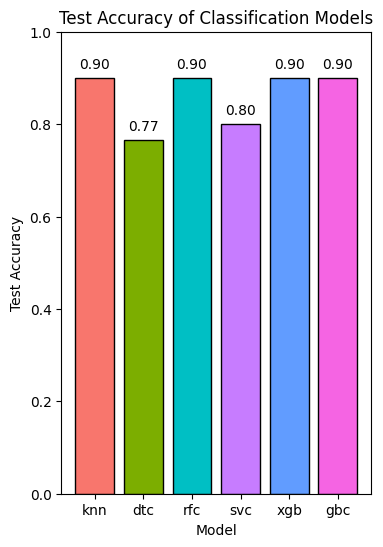

In [63]:
# Define a color palette for the bar plot
bar_colors = ['#F8766D', '#7CAE00', '#00BFC4', '#C77CFF', '#619CFF', '#F564E3']

# Create the bar plot with custom colors
fig, ax = plt.subplots(figsize=(4, 6))
x_pos = np.arange(len(models))
ax.bar(x_pos, test_accuracy, align='center', color=bar_colors, edgecolor='k')
ax.set_xticks(x_pos)
ax.set_xticklabels(['knn', 'dtc', 'rfc', 'svc', 'xgb', 'gbc'], rotation=0, ha='center')
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy of Classification Models')

# Add the value labels to the plot
for i, v in enumerate(test_accuracy):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', color='black')

plt.ylim(0,1.00)

#plt.savefig(pwd + '/results/classification_model_test_accuracy.png', dpi=500, bbox_inches="tight")
plt.show()

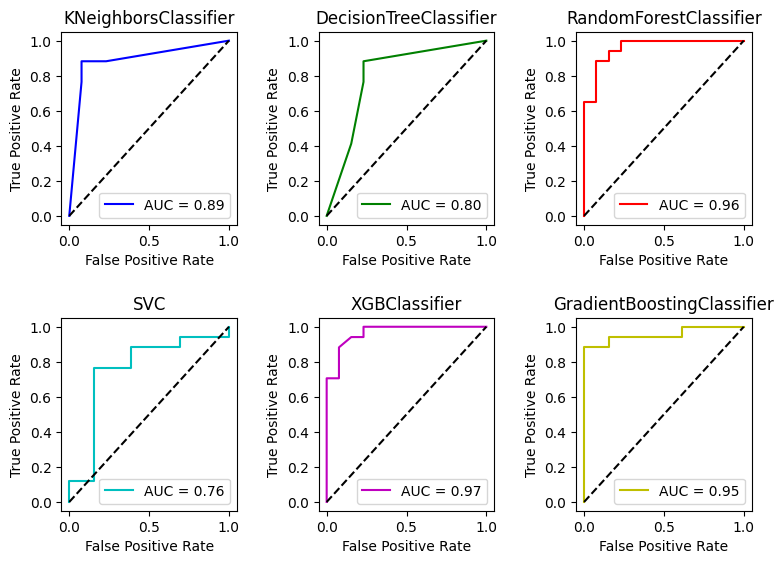

In [64]:
# Define the colors for the ROC curves
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Create subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(8, 6))


# Dictionary to store AUC values
auc_values = {}

# Dictionary to store AUC, TPR, and FPR values
roc_data = {}

# Iterate through the list of models and plot the ROC curves in the subplots
for i, model in enumerate(models):
    # Fit the model on the training data
    #model.fit(X_train, y_train)
    
    # Predict the probabilities for the test data
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store AUC, TPR, and FPR values in the dictionary
    roc_data[type(model).__name__] = {'AUC': roc_auc, 'FPR': list(fpr), 'TPR': list(tpr)}
    
    # Store AUC value in the dictionary
    auc_values[type(model).__name__] = roc_auc
    
    # Plot the ROC curve in the appropriate subplot
    row = i // 3
    col = i % 3
    ax[row, col].plot(fpr, tpr, color=colors[i], label=f"AUC = {roc_auc:.2f}")
    ax[row, col].plot([0, 1], [0, 1], color='k', linestyle='--')
    ax[row, col].set_xlabel('False Positive Rate')
    ax[row, col].set_ylabel('True Positive Rate')
    ax[row, col].set_title(type(model).__name__)
    ax[row, col].legend(loc="lower right")

plt.tight_layout(pad=2)

#plt.savefig(pwd + '/results/classification_model_ROC_curve.png', dpi=500, bbox_inches="tight")
plt.show()


# Convert the ROC data to DataFrame and save to Excel
df_auc = pd.DataFrame({
    'Model': [key for key in roc_data.keys()],
    'AUC': [roc_data[key]['AUC'] for key in roc_data.keys()],
    'FPR': [roc_data[key]['FPR'] for key in roc_data.keys()],
    'TPR': [roc_data[key]['TPR'] for key in roc_data.keys()]
})

with pd.ExcelWriter(pwd + '/model_comparison/ROC_data.xlsx') as writer:
    df_auc.to_excel(writer, index=False, sheet_name='AUC_FPR_TPR_values')

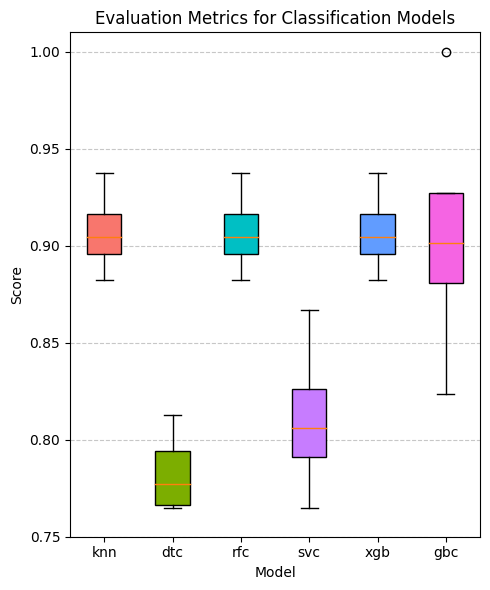

In [65]:
# Define a color palette for the box plot
box_colors = ['#F8766D', '#7CAE00', '#00BFC4', '#C77CFF', '#619CFF', '#F564E3']
 
# Create a box plot of the scores for each model and metric
fig, ax = plt.subplots(figsize=(5, 6))
boxplot = ax.boxplot(scores, patch_artist=True)

# Add color to the boxes
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['knn', 'dtc', 'rfc', 'svc', 'xgb', 'gbc'], rotation=0, ha='center')
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Evaluation Metrics for Classification Models')
ax.set_ylim(0.75, 1.01)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#plt.savefig(pwd + '/results/classification_model_evaluation_metrics.png', dpi=500, bbox_inches="tight")
plt.show()

In [66]:
scores

[[0.9, 0.9375, 0.8823529411764706, 0.9090909090909091],
 [0.7666666666666667, 0.8125, 0.7647058823529411, 0.787878787878788],
 [0.9, 0.9375, 0.8823529411764706, 0.9090909090909091],
 [0.8, 0.8666666666666667, 0.7647058823529411, 0.8125],
 [0.9, 0.9375, 0.8823529411764706, 0.9090909090909091],
 [0.9, 1.0, 0.8235294117647058, 0.9032258064516129]]

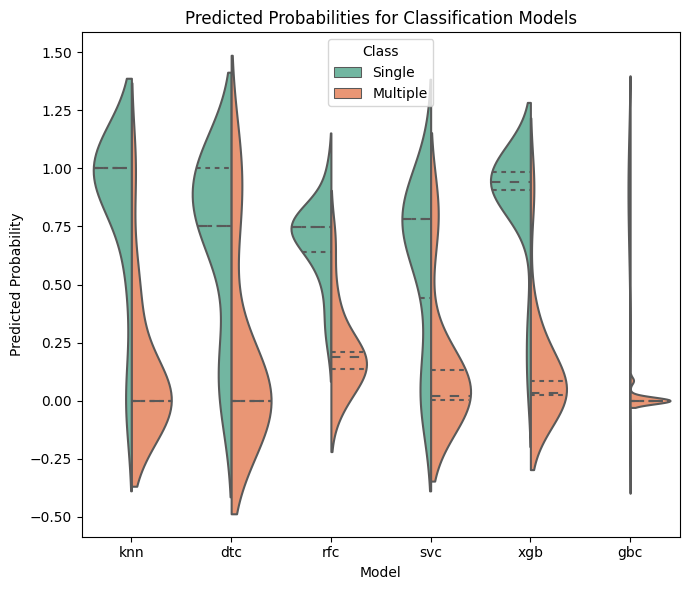

In [74]:
data = []
y_test_list = list(y_test)
for name, probs in y_probs.items():
    for i, prob in enumerate(probs):
        data.append({'Model': name, 'Class': y_test_list[i], 'Probability': prob[1]})

df = pd.DataFrame(data)

# Define the label mappings for the 'hue' variable
class_labels = {1: 'Single', 0: 'Multiple'}

# Map the 'Class' variable to the new labels using the 'replace' method of the Pandas DataFrame
df['Class'] = df['Class'].replace(class_labels)

# Save the DataFrame to an Excel file
with pd.ExcelWriter(pwd + '/model_comparison/predicted_probabilities.xlsx') as writer:
    df.to_excel(writer, index=False)

# Create the violin plot with the modified legend labels
fig, ax = plt.subplots(figsize=(7, 6))
sns.violinplot(x='Model', y='Probability', hue='Class', data=df, palette='Set2', split=True, inner='quart', ax=ax,
               hue_order=list(class_labels.values()))
ax.set_title('Predicted Probabilities for Classification Models')
ax.set_xlabel('Model')
ax.set_ylabel('Predicted Probability')
ax.set_xticklabels(['knn', 'dtc', 'rfc', 'svc', 'xgb', 'gbc'], rotation=0, ha='center')
ax.legend(title='Class', loc='upper center')
plt.tight_layout()

#plt.savefig(pwd + '/results/classification_model_predicted_probabilities.png', dpi=500, bbox_inches="tight")
plt.show()

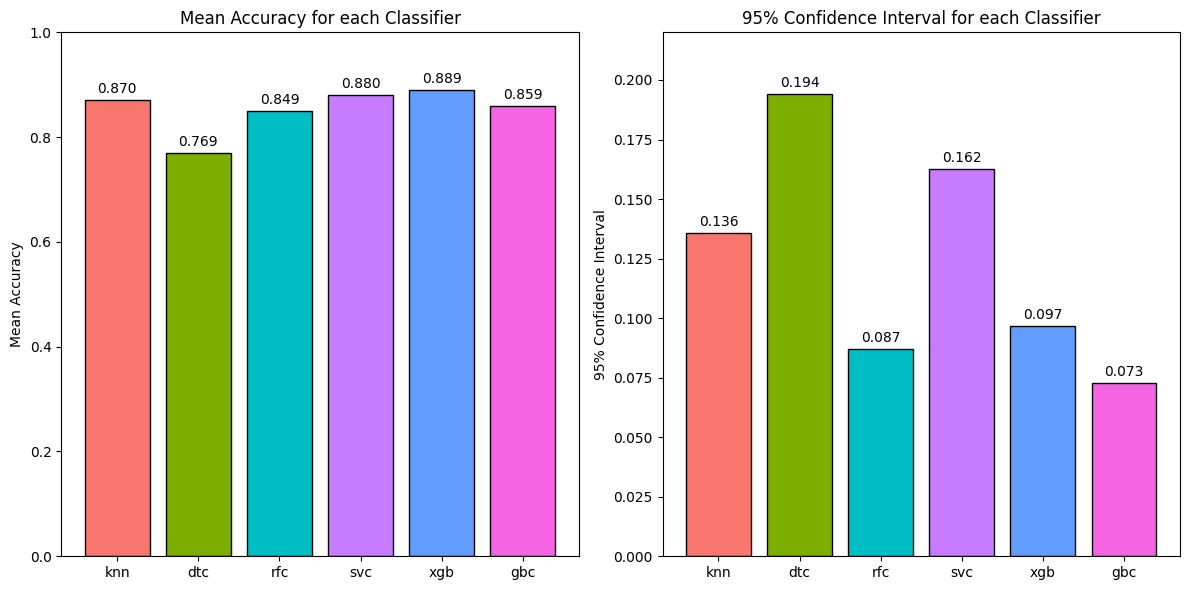

In [68]:
cross_val_results = pd.read_csv(pwd+'/results/cross_val_results.csv')
# Filter the DataFrame to remove rows where Classifier is "GaussianNB"
cross_val_results = cross_val_results[cross_val_results['Classifier'] != 'GaussianNB']

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Create a subplot with 1 row and 2 columns
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create an array with the position of each bar along the x-axis
x = np.arange(len(cross_val_results))

# Bar plot for Mean Accuracy
rects1 = axes[0].bar(x, cross_val_results["Mean Accuracy"], color=bar_colors, edgecolor='k')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['knn', 'dtc', 'rfc', 'svc', 'xgb', 'gbc'], rotation=0, ha='center')
axes[0].set_ylabel("Mean Accuracy")
axes[0].set_title("Mean Accuracy for each Classifier")
axes[0].set_ylim(0, 1)
add_labels(axes[0], rects1)

# Bar plot for 95% Confidence Interval
rects2 = axes[1].bar(x, cross_val_results["95% Confidence Interval"], color=bar_colors, edgecolor='k')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['knn', 'dtc', 'rfc', 'svc', 'xgb', 'gbc'], rotation=0, ha='center')
axes[1].set_ylim(0, 0.22)
axes[1].set_ylabel("95% Confidence Interval")
axes[1].set_title("95% Confidence Interval for each Classifier")
add_labels(axes[1], rects2)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig(pwd + '/results/k_fold_cross_val.png', dpi=500, bbox_inches="tight")
plt.show()

#### RF Feature importance

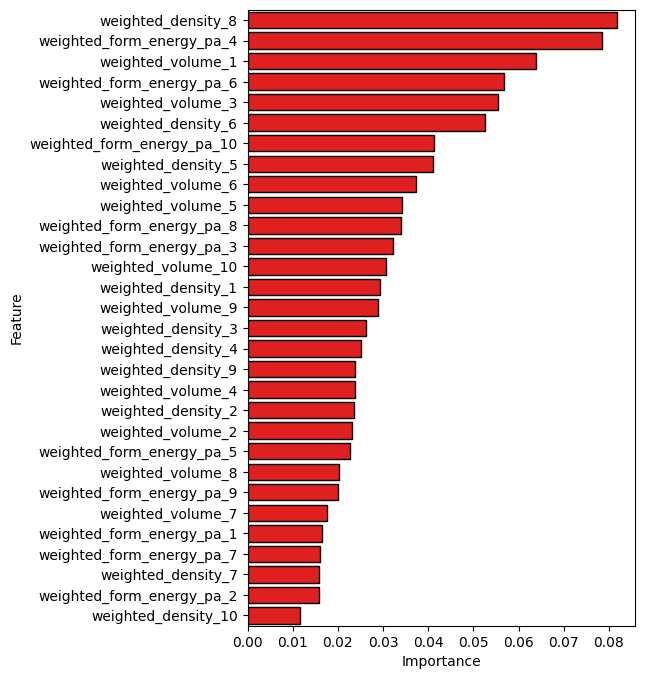

In [69]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = X_train.columns
feature_importance_df["Importance"] = rf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(5,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= feature_importance_df, color='red', edgecolor='k')
#plt.savefig(pwd + '/results/rfc_feature_importance.png', dpi=500, bbox_inches="tight")
plt.show()

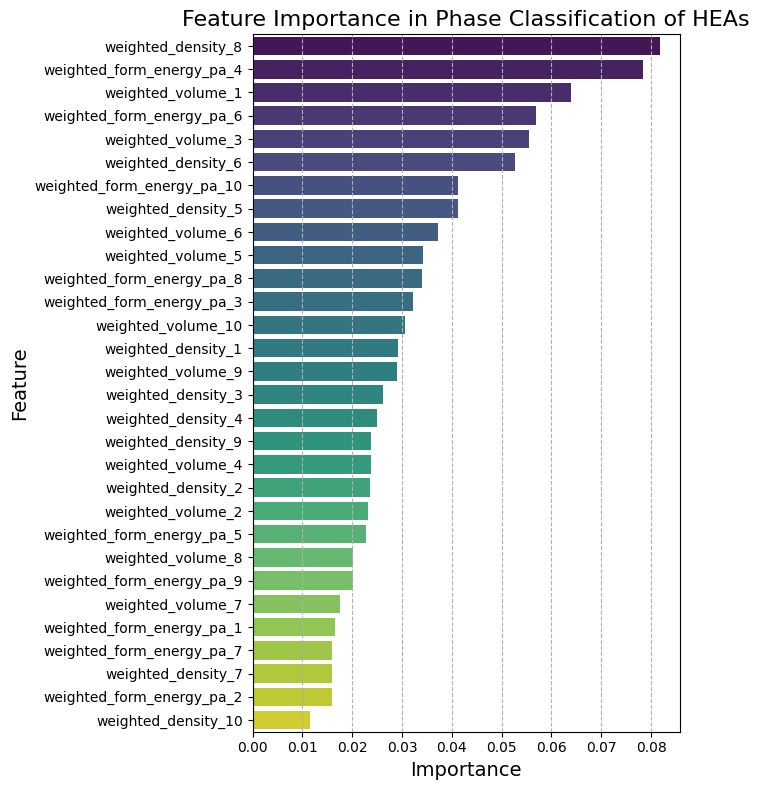

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe based on importance values
sorted_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(7, 8))
sns.barplot(data=sorted_df, y="Feature", x="Importance", palette="viridis")
plt.title("Feature Importance in Phase Classification of HEAs", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis="x", linestyle="--")
plt.tight_layout()
plt.savefig(pwd + '/results/rfc_feature_importance2.png', dpi=2000, bbox_inches="tight")
plt.show()

In [71]:
#feature_importance_df.to_excel(pwd + "/feature_importance_df.xlsx", index=False)

#### XGBoost Feature importance

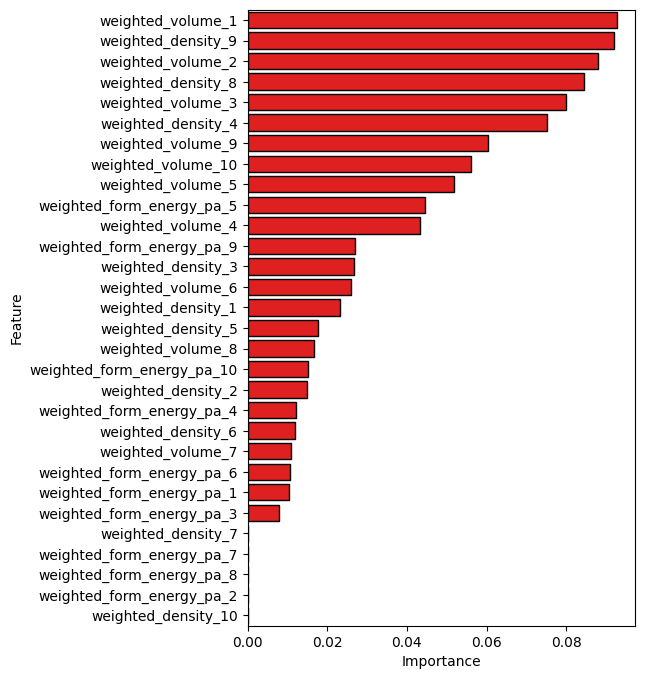

In [72]:
xgb_feature_importance_df = pd.DataFrame()
xgb_feature_importance_df["Feature"] = X_train.columns
xgb_feature_importance_df["Importance"] = xgb.feature_importances_

xgb_feature_importance_df  = xgb_feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(5,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= xgb_feature_importance_df, color='red', edgecolor='k')
#plt.savefig(pwd + '/results/xgb_feature_importance.png', dpi=500, bbox_inches="tight")
plt.show()

#### Calculating accuracy for diffrent phase counts using KNN

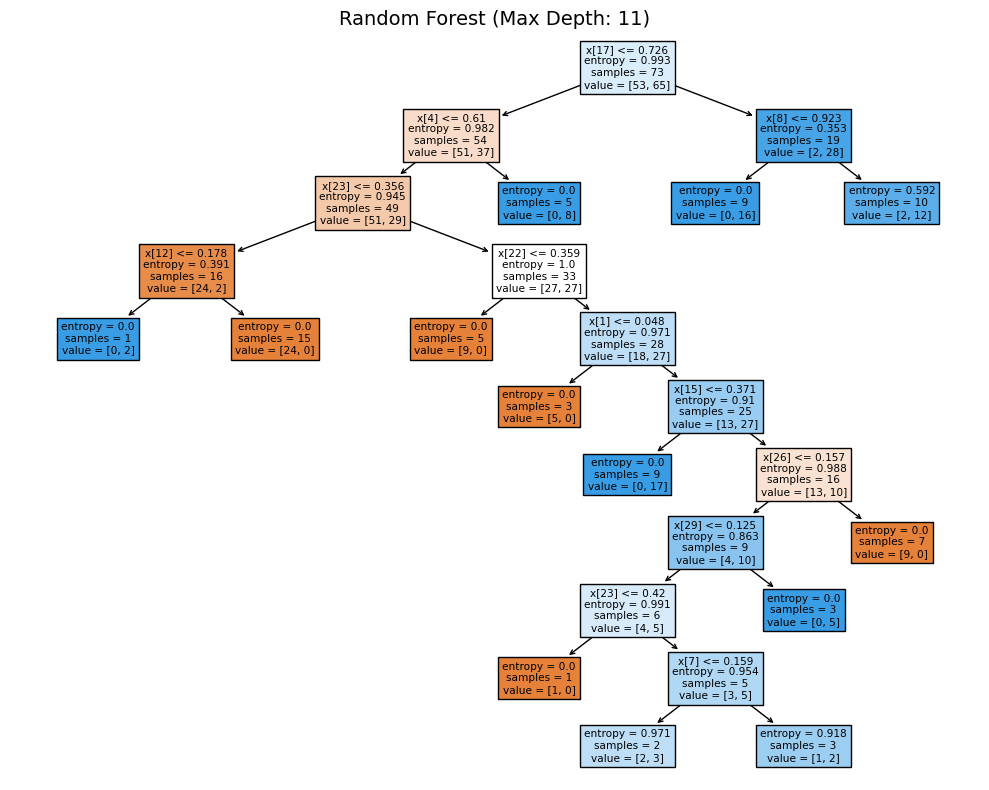

In [73]:
from sklearn.tree import plot_tree

# Set the maximum depth for visualizing the trees
max_depth = 11

# Visualize the first tree of the Random Forest
plt.figure(figsize=(10, 8))
plot_tree(rfc.estimators_[0], max_depth=max_depth, filled=True)
plt.title(f'Random Forest (Max Depth: {max_depth})', fontsize=14)
plt.tight_layout()

#plt.savefig(pwd + '/results/rfc_tree_visualization.png', dpi=500, bbox_inches="tight")
plt.show()